# 1 Basic operation on Image
(a) Adjust the brightness of an image by modifying pixel intensity values.

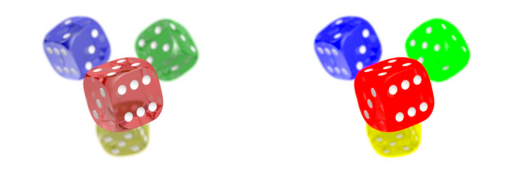

In [4]:
img_path="cube.jpg"
 
from PIL import Image,ImageEnhance
import matplotlib.pyplot as plt

img=Image.open(img_path)
enhancer=ImageEnhance.Color(img)
img_enhanced=enhancer.enhance(5)

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_enhanced)
plt.axis('off')
plt.show()



(b) Flip an image horizontally and vertically to demonstrate axis-based transformations.

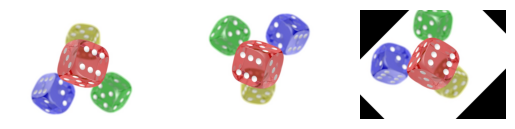

In [2]:
img_vertical=img.transpose(Image.FLIP_TOP_BOTTOM)
img_horizontal=img.transpose(Image.FLIP_LEFT_RIGHT)
img_rotated=img.rotate(45)

plt.subplot(1,3,1)
plt.imshow(img_vertical)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(img_horizontal)
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(img_rotated)
plt.axis('off')
plt.show()


(C) Extract and display individual red, green, and blue channels of an RGB image.

d. Display of gray scale images.

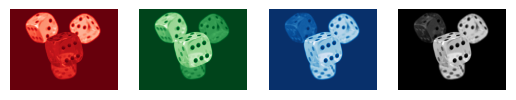

In [3]:
img_rgb=img.convert('RGB')
r,g,b=img_rgb.split()
plt.subplot(1,4,1)
plt.imshow(r,cmap='Reds')
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(g,cmap='Greens')
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(b,cmap='Blues')
plt.axis('off')
plt.subplot(1,4,4)

plt.imshow(b,cmap='Grays')
plt.axis('off')
plt.show()


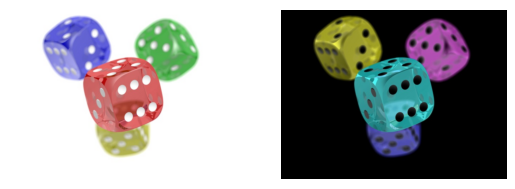

In [5]:
# (E) To find the negative of an image.

import numpy as np
import cv2

img=cv2.imread(img_path)
img_negative=255-img
cv2.imshow('Original Image',img)
cv2.imshow('Negative Image',img_negative)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img_negative,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# 2. Using histogram for image quality analysis
A. Calculate the Histogram of a given image.

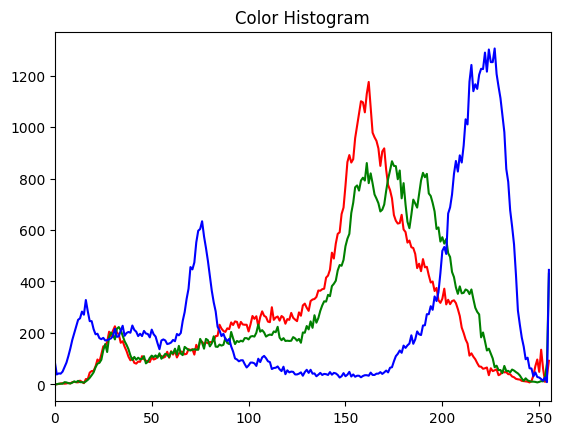

In [8]:
img_path="tower.jpg"
img=Image.open(img_path)

img_array=np.array(img)
colors=('r','g','b')
channel_ids=(0,1,2)

plt.figure()
for channel_id,color in zip(channel_ids,colors):
    histogram,bins=np.histogram(img_array[:,:,channel_id],bins=256,range=(0,256))
    plt.plot(histogram,color=color)
    plt.xlim([0,256])
    
plt.title('Color Histogram')
# plt.xlabel('Pixel Intensity')
# plt.ylabel('Number of Pixels')
plt.show()


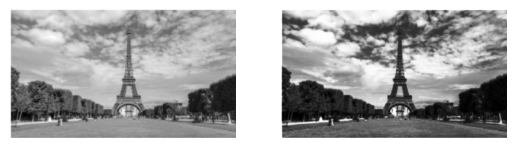

In [35]:
# Histogram Equalization.
img=cv2.imread(img_path,0)
equalized_img=cv2.equalizeHist(img)

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(equalized_img,cmap='gray')
plt.axis('off')
plt.show()



In [39]:
# 3.Program for Image Filtering


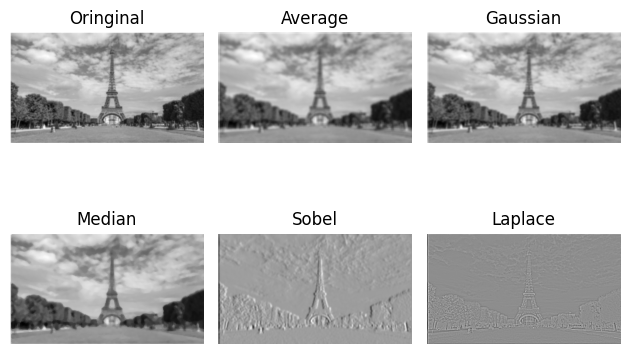

In [38]:
#Low pass filter => 1)Average filter2)Weighted Average filter3)Median filter
# High pass filters using=>1) Sobel operator2) Laplacian operator
results=[
    ("Oringinal",img),
    ("Average",cv2.blur(img,(5,5))),
    ("Gaussian",cv2.GaussianBlur(img,(5,5),0)),
    ("Median",cv2.medianBlur(img,5)),
    ("Sobel",cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)),
    ("Laplace",cv2.Laplacian(img,cv2.CV_64F))
]

for i,(name,filtered_img) in enumerate(results):
    plt.subplot(2,3,i+1)
    plt.imshow(filtered_img,cmap='gray')
    plt.title(name)
    plt.axis('off')
plt.tight_layout()
plt.show()


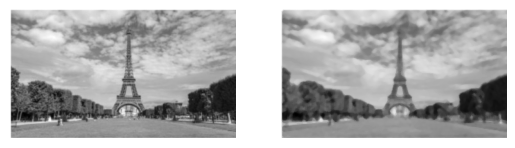

In [ ]:
# Design non-linear filtering.
median_filtered_img=cv2.medianBlur(img,5)
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(median_filtered_img,cmap='gray')
plt.axis('off')
plt.show()

# 4. Edge detection with gradient and convolution of an Image


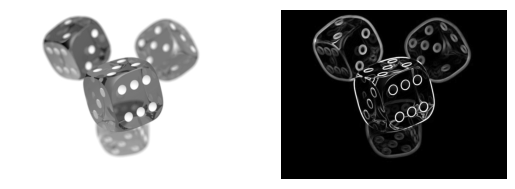

In [ ]:
img=cv2.imread("cube.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

kx= np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
ky= np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

ix=cv2.filter2D(gray,cv2.CV_64F,kx)
iy=cv2.filter2D(gray,cv2.CV_64F,ky)

magnitude=np.sqrt(ix**2+iy**2)
magnitude=np.uint8(np.clip(magnitude,0,255))
magnitude.astype(np.uint8)

plt.subplot(1,2,1)
plt.imshow(gray,cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(magnitude,cmap='gray')
plt.axis('off')
plt.show()

In [41]:
# 5. FINDING THRESOLD

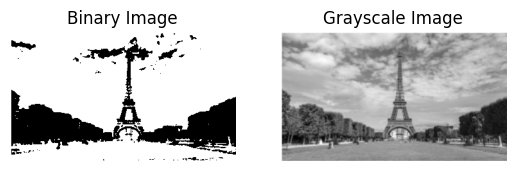

In [24]:
# (A) Program to find threshold of grayscale image.
image_path = "Tower.jpg"  # your uploaded file
img = cv2.imread(image_path)
gray_image=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

_,binary_img=cv2.threshold(gray_image,128,255,cv2.THRESH_BINARY)
plt.subplot(1,2,1)
plt.imshow(binary_img,cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(gray_image,cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

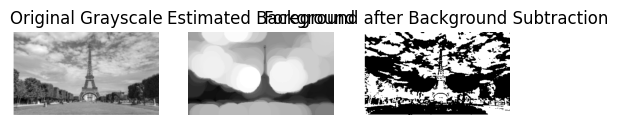

In [34]:
# 6. Program to estimate and subtract the background of an image.
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image_path = "Tower.jpg"  # uploaded image
img = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 2: Estimate background using morphological opening
# (large kernel to remove small details and keep background)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50, 50))
background = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)

# Step 3: Subtract background from the original grayscale image
foreground = cv2.absdiff(gray, background)

# Optional: Threshold to make foreground clearer (binary form)
_, foreground_bin = cv2.threshold(foreground, 30, 255, cv2.THRESH_BINARY)

plt.subplot(1,3,1)
plt.imshow(gray,cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(background,cmap='gray')
plt.title('Estimated Background')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(foreground_bin,cmap='gray')
plt.title('Foreground after Background Subtraction')
plt.axis('off')
plt.show()


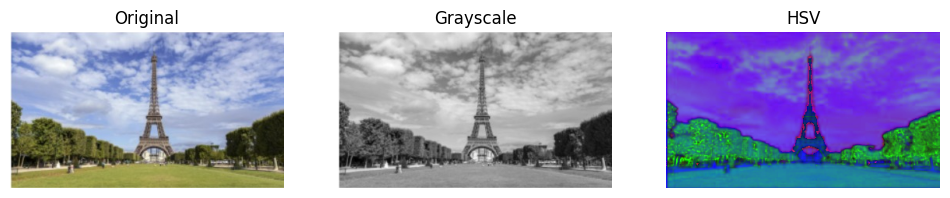

In [25]:
# 7 Program to convert color image to gray and hsv.
# Convert from BGR (OpenCV default) to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
       
# Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Plot all images
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(hsv)
plt.title("HSV")
plt.axis("off")

plt.show()

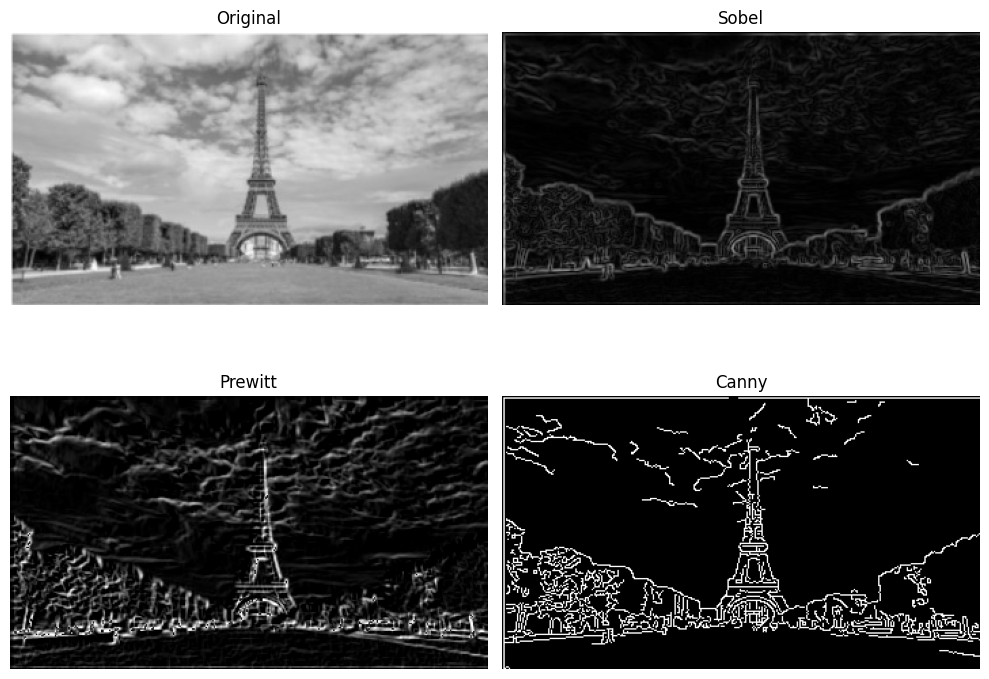

In [26]:
# 8(A). Determination of edge detection using operators.
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("Tower.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ---------------- Sobel ----------------
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)

# ---------------- Prewitt ----------------
# Prewitt kernels
kernelx = np.array([[-1,0,1], [-1,0,1], [-1,0,1]])
kernely = np.array([[-1,-1,-1], [0,0,0], [1,1,1]])

prewittx = cv2.filter2D(gray, -1, kernelx)
prewitty = cv2.filter2D(gray, -1, kernely)
prewitt = prewittx + prewitty

# ---------------- Canny ----------------
canny = cv2.Canny(gray, 100, 200)

# ---------------- Plotting ----------------
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.imshow(gray, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(sobel, cmap="gray")
plt.title("Sobel")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(prewitt, cmap="gray")
plt.title("Prewitt")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(canny, cmap="gray")
plt.title("Canny")
plt.axis("off")

plt.tight_layout()
plt.show()

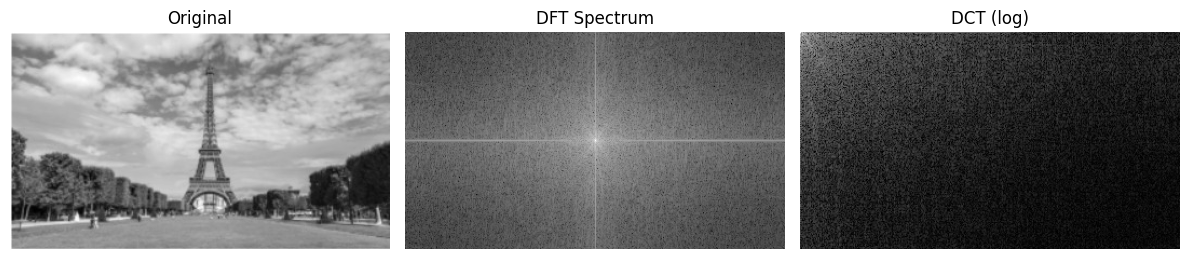

In [27]:
 # (B) 2-D DFT and DCT.

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("Tower.jpg", 0)  # grayscale

# ------------------ 2D DFT ------------------
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)   # shift zero freq to center
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]) + 1)

# ------------------ 2D DCT ------------------
dct = cv2.dct(np.float32(img))
dct_log = np.log(abs(dct) + 1)

# ------------------ Plotting ------------------
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(magnitude_spectrum, cmap="gray")
plt.title("DFT Spectrum")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(dct_log, cmap="gray")
plt.title("DCT (log)")
plt.axis("off")

plt.tight_layout()
plt.show()


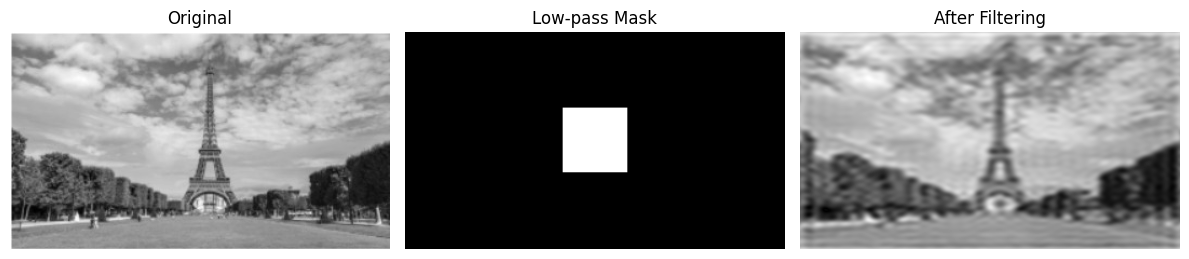

In [28]:
# c. Filtering in Frequency domain.
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread("Tower.jpg", 0)  

# ---------------- DFT ----------------
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Create a mask (low-pass filter)
rows, cols = img.shape
crow, ccol = rows // 2 , cols // 2   # center
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1   # square low-pass mask

# Apply mask and inverse DFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

# ---------------- Plotting ----------------
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(mask[:,:,0]*255, cmap='gray')
plt.title("Low-pass Mask")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img_back, cmap='gray')
plt.title("After Filtering")
plt.axis("off")

plt.tight_layout()
plt.show()

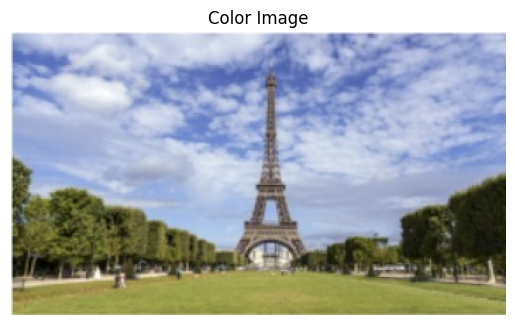

In [29]:
#9.A) Display of colour images.

import cv2
import matplotlib.pyplot as plt

# Load the image (OpenCV loads as BGR by default)
img = cv2.imread("Tower.jpg")

# Convert BGR to RGB for correct display in Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the color image
plt.imshow(img_rgb)
plt.title("Color Image")
plt.axis("off")
plt.show()

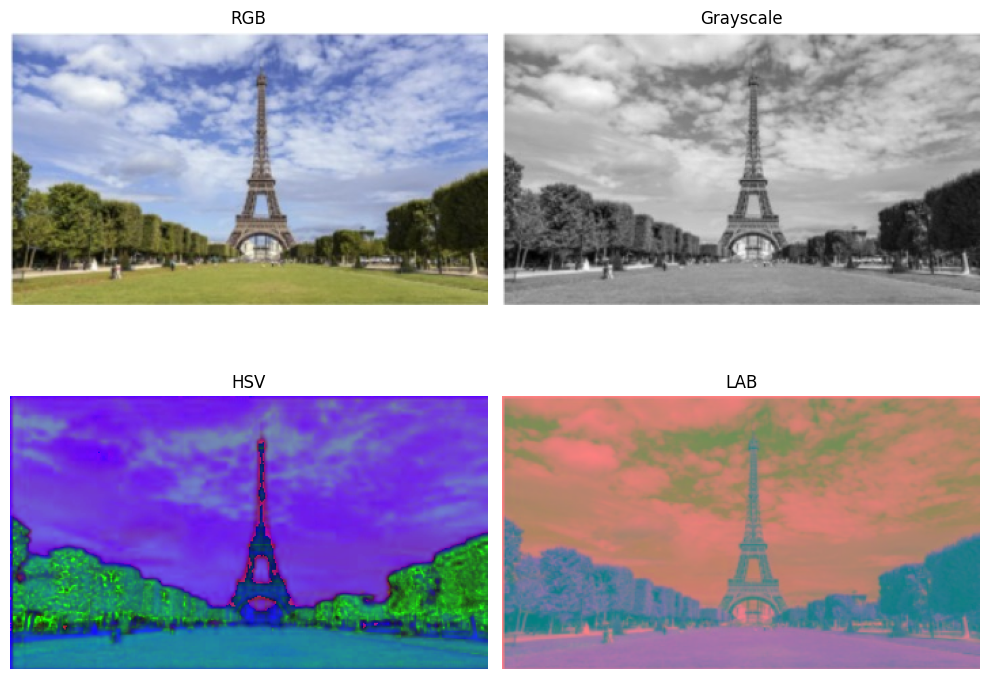

In [30]:
# b. Conversion between colour spaces.
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("Tower.jpg")

# Convert to RGB (for correct display in Matplotlib)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Convert to LAB
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# ------------------ Plotting ------------------
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.imshow(rgb)
plt.title("RGB")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(hsv)
plt.title("HSV")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(lab)
plt.title("LAB")
plt.axis("off")

plt.tight_layout()
plt.show()

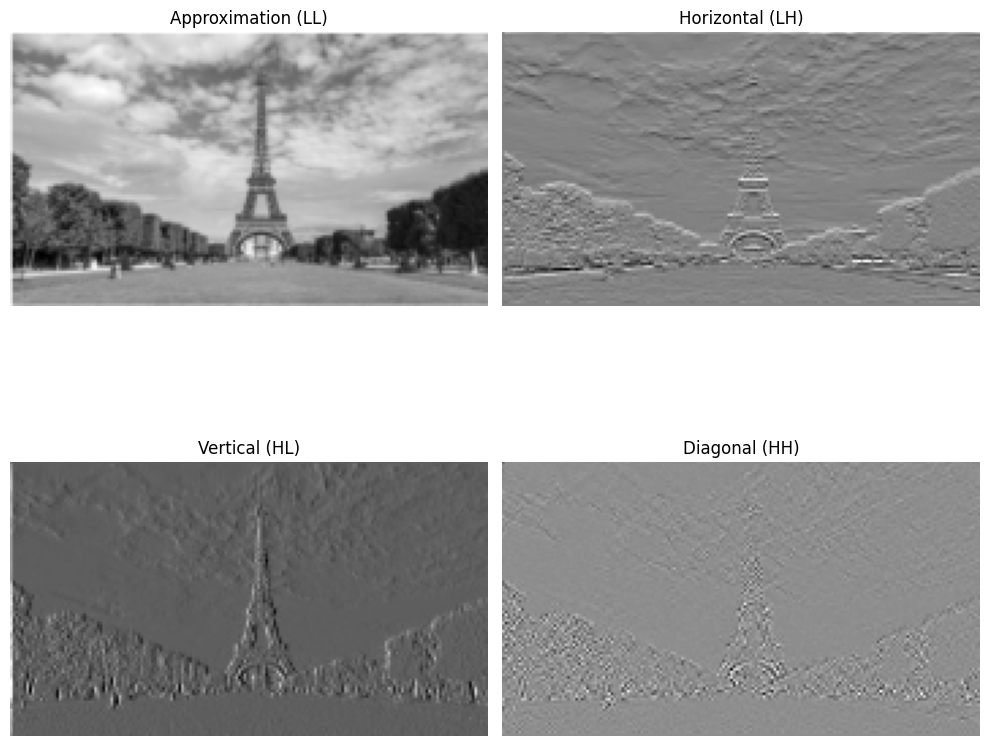

In [31]:
# 10 (A) DWT of images

import cv2
import matplotlib.pyplot as plt
import pywt

# Load the image in grayscale
img = cv2.imread("Tower.jpg", 0)

# Perform single-level 2D DWT
coeffs2 = pywt.dwt2(img, 'haar')
LL, (LH, HL, HH) = coeffs2

# ------------------ Plotting ------------------
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(LL, cmap='gray')
plt.title("Approximation (LL)")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(LH, cmap='gray')
plt.title("Horizontal (LH)")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(HL, cmap='gray')
plt.title("Vertical (HL)")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(HH, cmap='gray')
plt.title("Diagonal (HH)")
plt.axis("off")

plt.tight_layout()
plt.show()

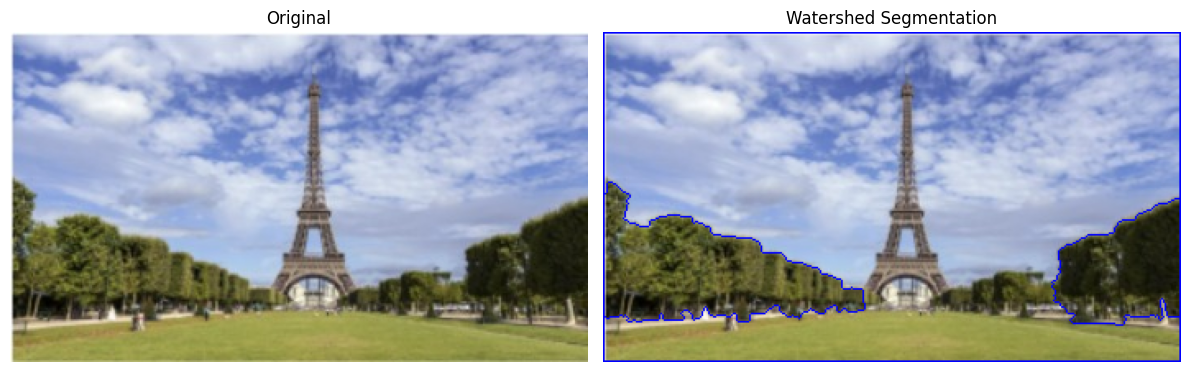

In [32]:
# b. Segmentation using watershed transform

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("Tower.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Thresholding
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal using Morphological operations
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0 but 1
markers = markers + 1

# Mark the unknown region with zero
markers[unknown == 255] = 0

# Apply watershed
markers = cv2.watershed(img, markers)
img_rgb[markers == -1] = [0, 0, 255]  # boundaries in red

# ------------------ Plotting ------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_rgb)
plt.title("Watershed Segmentation")
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# Low pass filter => 1)Average filter2)Weighted Average filter3)Median filter High pass filters using=>1) Sobel operator2) Laplacian operator
# Program to estimate and subtract the background of an image.
# Determination of edge detection using operators.
# Filtering in Frequency domain.
# b. Segmentation using watershed transform
